# Regression in Machine Learning

Regression is a statistical technique widely used in data analysis and machine learning to model the relationship between one or more independent variables (also known as predictors or features) and a dependent variable (also known as the target or response). 
The goal of regression analysis is to understand how the changes in the independent variables influence the variation in the dependent variable.

In this lab, you will gain hands-on experience in applying linear regression models using the R lm function. Particularly, you will acquire an understanding of the fundamentals of utilizing regression models for prediction purposes.

## Linear Regression

Linear regression is a widely used statistical method for modeling the relationship between a dependent variable and one or more independent variables. The purpose is to find a straight line (or plane in higher dimensions) that best fits the data, minimizing the distance between the observed values and the predicted values. 

- It is commonly used for prediction and understanding the impact of the independent variables on the dependent variable. 
- Linear regression is simple yet powerful, making it a fundamental tool in data analysis and machine learning.

### Let's perform a  Liner Regression example

Start with training and evaluating a linear regression model. 
For this exercise, you'll work with simulated data, enabling a comparison of the computed results to the known properties of the data.

To get started, run the code provided in the cell below. This step will load the necessary packages required to execute the rest of the notebook.

In [5]:
## Import packages
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

Now run the command given in below cell. The code simulates data and generates a plot to visualize the results. The data possesses the following characteristics:

1. The x variable is equally distributed between 0.0 and 10.0.
2. The y variable is obtained by adding a Normally distributed random component to the x variable. Consequently, for the unscaled data, the slope coefficient should equal 1.0, and the intercept should be 0.0.

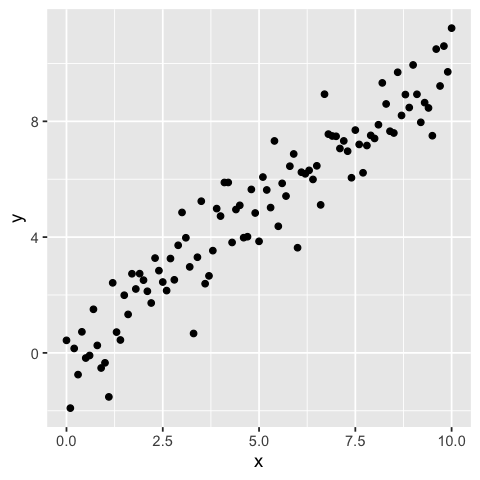

In [6]:
set.seed(34567)
df = data.frame(x = seq(from = 0.0, to = 10.0, by = 0.1))
df$y=df$x + rnorm(length(df$x), mean = 0.0, sd = 1.0)

ggplot(df, aes(x,y)) + geom_point()

    As expected, the data shown a clear linear trend. However, there is some variability in the data due to the inclusion of Normally distributed noise.

### Split the Dataset

To ensure optimal performance of machine learning models, effective data preparation is crucial. Poor data preparation often leads to underperforming models.

- The initial step in data preparation involves creating independently sampled training and test datasets. In certain cases, an independently sampled evaluation dataset may also be used for model improvement and comparison.

- Using the same data for training and testing a machine learning model can result in the model memorizing the training data, leading to information leakage and poor generalization. A well-generalized model produces consistent outcomes when presented with new, unseen cases, while a poorly generalized model might exhibit unexpected behavior.

- Random sub-samples of the data are created using Bernoulli sampling, where each case has a probability (p) of being included in the training dataset, and the probability of being in the test dataset becomes (1-p).

The provided code uses the `sample` function to generate a set of indices for splitting the dataset. These indices, along with their negation, are used to sample the original data frame, effectively creating the training and test datasets. To proceed, execute the code in the cell.

In [8]:
set.seed(9988)
test_idx <- sample(seq_len(nrow(df)), size = 50)

train <- df[test_idx, ] # Select the training rows
test <- df[-test_idx, ] # Select the test rows
dim(train)
dim(test)

[1] 50  2

[1] 51  2

### Scale Numeric Features

Now the dataset is split, it is crucial to re-scale the numeric feature column. Rescaling numeric features is important to prevent the range of a feature from dominating its influence on the training of the machine learning model.

For instance, consider a dataset with two features: age in years (typically ranging in the tens) and income (typically ranging in tens or hundreds of thousands). It is unreasonable to assume that income is more important than age in a model solely because it has a wider range of values. To mitigate this issue, numeric features are standardized to the same range.

In this lab, Z-Score normalization is employed. Z-Score normalization transforms a variable to have a mean of zero and a standard deviation (or variance) of one.

The code provided calculates the center (mean) and scale (standard deviation) of the feature. These scaling parameters are then applied to the feature in both the train and test data frames.

It's crucial to note that the scaling transform should only be computed on the training data, not the test or evaluation data. Typically, numeric labels do not require scaling, although other transformations may be necessary.

To proceed, execute the code in the cell below, which applies the Z-Score transformation to the training and test features.

In [10]:
scale <- sd(train$y)
center <- mean(train$y)
train$y <- (train$y - center)/scale
test$y <- (test$y - center)/scale

### Train the Regression Model

In R, models are defined using an equation with the ~ symbol, denoting "modeled by." In essence, the variable to be modeled is always placed on the left side, while the features are listed on the right side. This fundamental structure can be represented as follows.
#### label ~ features

Run the code in the cell below to fit and create the model object.

In [14]:
## fit the linear regression model
set.seed(5678)
lin_mod = lm(y ~ x, data = train)

As an initial verification of this model, you can display the model coefficients. These coefficients are properties associated with the model object.

In [15]:
summary(lin_mod)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.6283589,0.07631753,-21.33663,3.862381e-26
x,0.3043662,0.01231072,24.72367,5.850946e-29


The coefficients are close to the values used in the simulation, namely, 0.0 and 1.0.

Subsequently, you will generate a plot displaying the predicted values calculated from the training features. This involves applying the `predict` method to the model object using the training data. 

The resulting plot showcases the raw label values alongside the line representing the predicted values or scores. To proceed, execute the code and observe the outcomes.

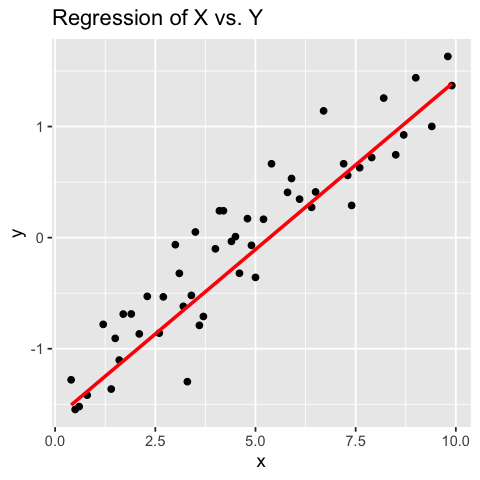

In [16]:
plot_regression = function(score, df){
    df$score = score
    ggplot(df) + geom_point(aes(x,y)) +
                 geom_line(aes(x,score), color = 'red', linewidth = 1) +
                 ggtitle('Regression of X vs. Y')
}

score = predict(lin_mod, newdata = test)
plot_regression(score, test)

The red line seems to align well with the data, with minimal errors between the scored values and residuals.

### Summary

In [18]:
In this lab, you have executed a complete machine learning process for a linear regression model.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: In this
       ^
